In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Direktori data
train_dir = '/content/drive/MyDrive/cobalagi/Train'
validation_dir = '/content/drive/MyDrive/cobalagi/Validasi'
test_dir = '/content/drive/MyDrive/cobalagi/Test'

In [ ]:
# Parameter
img_height, img_width = 224, 224
batch_size = 64

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2160 images belonging to 12 classes.
Found 276 images belonging to 12 classes.
Found 264 images belonging to 12 classes.


In [ ]:
def show_image_samples(gen):
    test_dict=test_generator.class_indices
    classes=list(test_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

In [ ]:
show_image_samples(train_generator)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
base_model=tf.keras.applications.VGG16(include_top=False, weights="imagenet",input_tensor=Input(shape=(224,224,3)))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:

model = tf.keras.Sequential([
            # Note the input shape is the desired size of the image 224x224 with 3 bytes color
            # This is the first convolution
            base_model,
            tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Dropout(rate=0.5),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 32)          147488    
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 12)                3468      
                                                        

In [ ]:
# Train model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
34/34 [==============================] - 1952s 56s/step - loss: 2.5621 - accuracy: 0.1773 - val_loss: 1.8860 - val_accuracy: 0.6812
Epoch 2/20
34/34 [==============================] - 1706s 50s/step - loss: 1.6505 - accuracy: 0.5032 - val_loss: 1.2287 - val_accuracy: 0.8188
Epoch 3/20
34/34 [==============================] - 1682s 49s/step - loss: 1.1153 - accuracy: 0.7111 - val_loss: 0.8191 - val_accuracy: 0.8768
Epoch 4/20
34/34 [==============================] - 1660s 49s/step - loss: 0.7927 - accuracy: 0.8009 - val_loss: 0.5957 - val_accuracy: 0.9094
Epoch 5/20
34/34 [==============================] - 1645s 48s/step - loss: 0.5820 - accuracy: 0.8704 - val_loss: 0.4533 - val_accuracy: 0.9239
Epoch 6/20
34/34 [==============================] - 1678s 49s/step - loss: 0.4615 - accuracy: 0.9060 - val_loss: 0.3644 - val_accuracy: 0.9348
Epoch 7/20
34/34 [==============================] - 1664s 49s/step - loss: 0.3651 - accuracy: 0.9306 - val_loss: 0.3057 - val_accuracy: 0.9348

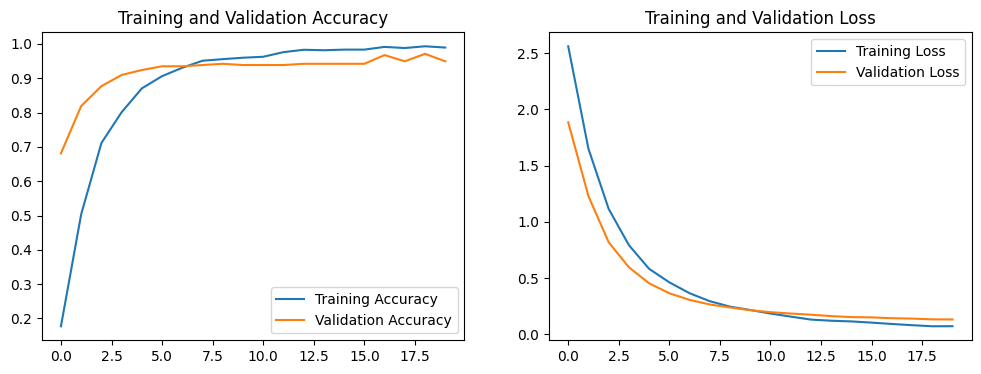

In [ ]:
# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2%}")

5/5 [==============================] - 212s 39s/step - loss: 0.0510 - accuracy: 0.9886
Test Accuracy: 98.86%


In [ ]:
# Predict on test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

<ipython-input-15-4866e26b3070>:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


5/5 [==============================] - 198s 34s/step


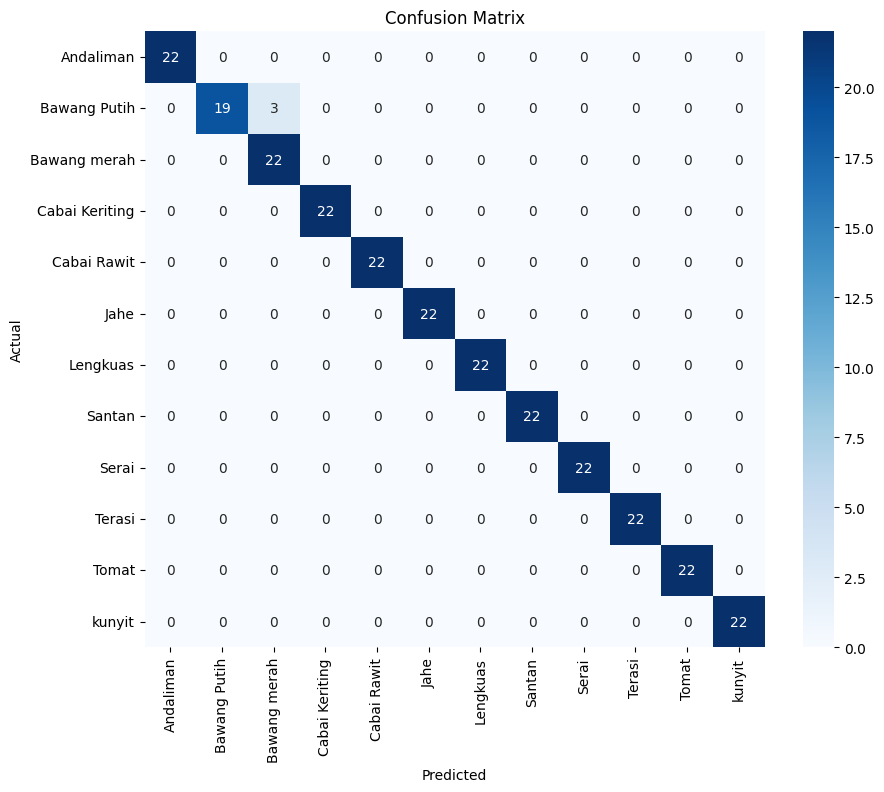

In [ ]:
#confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                precision    recall  f1-score   support

     Andaliman       1.00      1.00      1.00        22
  Bawang Putih       1.00      0.86      0.93        22
  Bawang merah       0.88      1.00      0.94        22
Cabai Keriting       1.00      1.00      1.00        22
   Cabai Rawit       1.00      1.00      1.00        22
          Jahe       1.00      1.00      1.00        22
      Lengkuas       1.00      1.00      1.00        22
        Santan       1.00      1.00      1.00        22
         Serai       1.00      1.00      1.00        22
        Terasi       1.00      1.00      1.00        22
         Tomat       1.00      1.00      1.00        22
        kunyit       1.00      1.00      1.00        22

      accuracy                           0.99       264
     macro avg       0.99      0.99      0.99       264
  weighted avg       0.99      0.99      0.99       264



In [ ]:
# Save model
model.save('VGG16(224,224,3).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
